In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-test.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Columns: 272 entries, yellow sputum to disease_label
dtypes: int64(271), object(1)
memory usage: 16.5+ MB
None


# Visualize Data Distribution

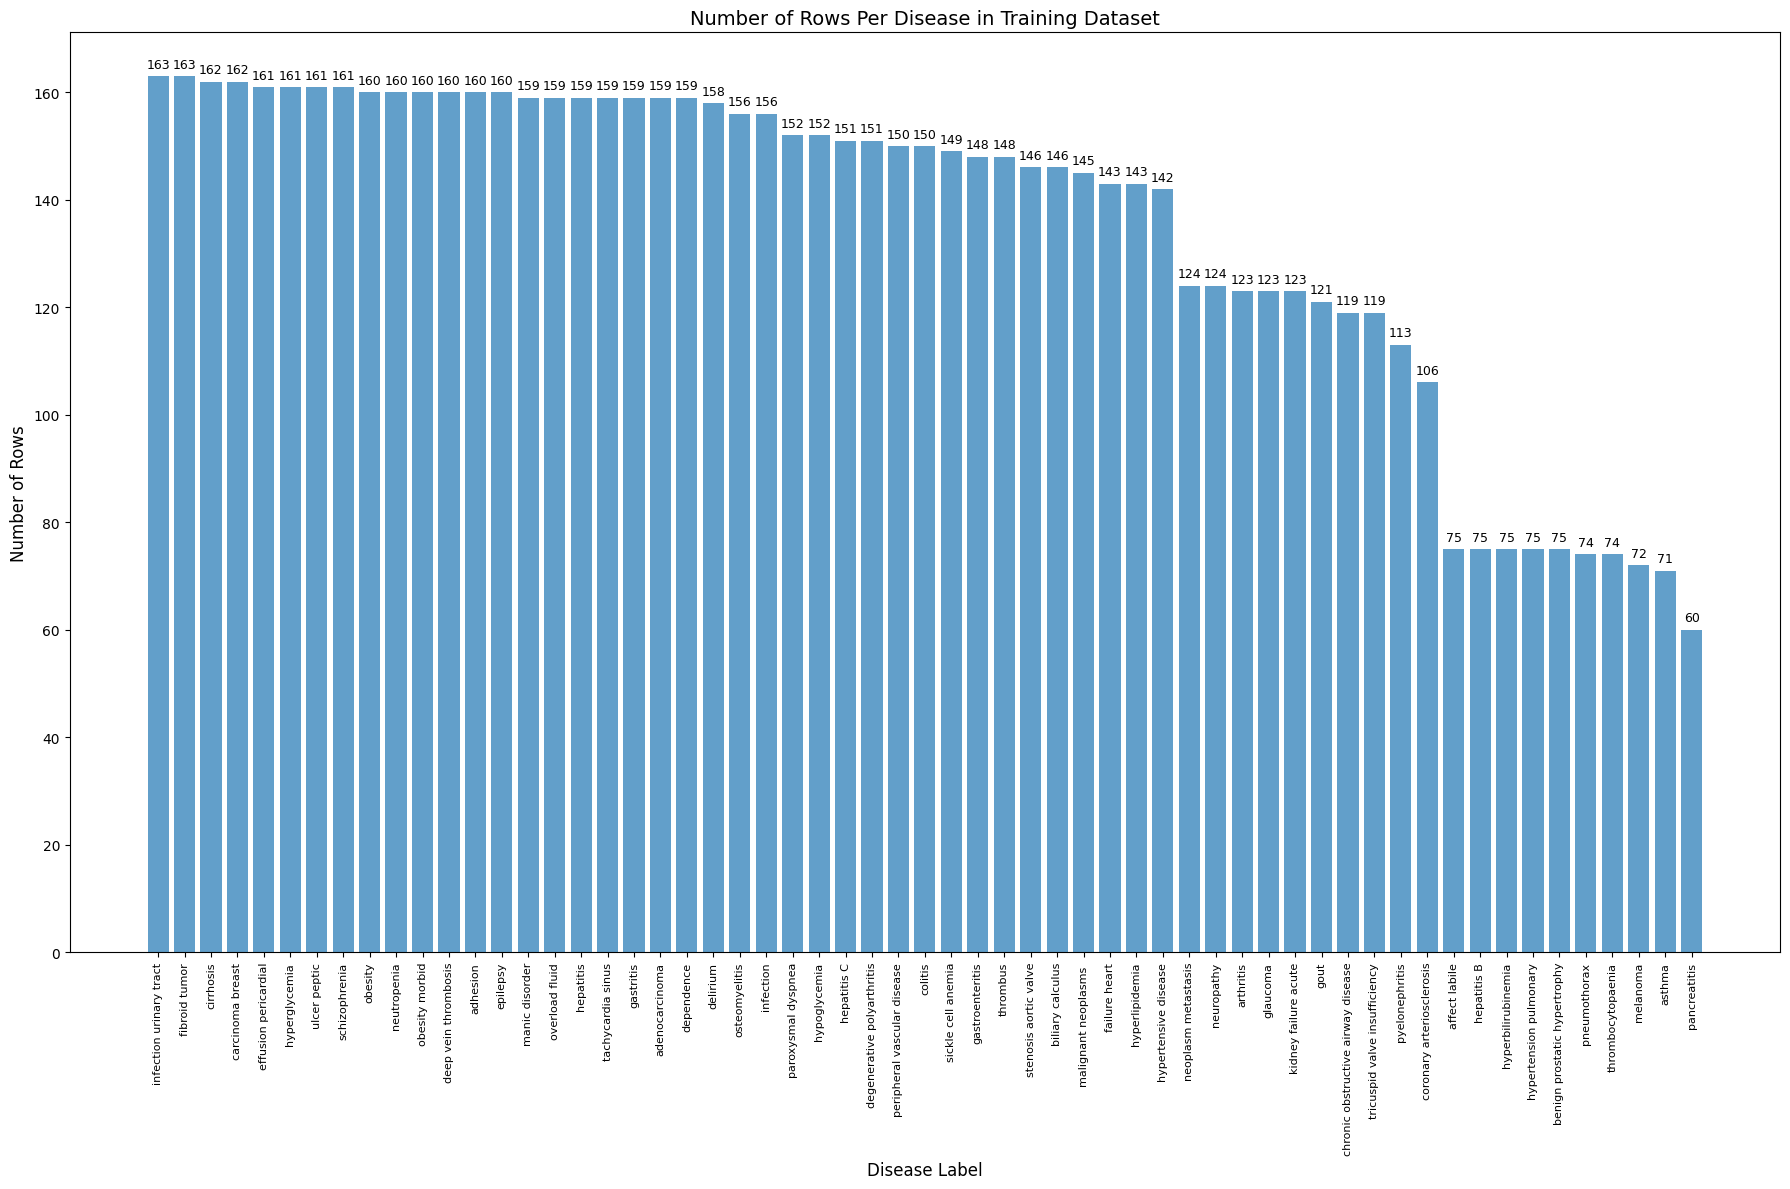

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Support Vector Classifier

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-train.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-val.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-test.csv")

# Separate features and target
X_train, y_train = train_data.drop(columns=["disease_label"]), train_data["disease_label"]
X_valid, y_valid = valid_data.drop(columns=["disease_label"]), valid_data["disease_label"]
X_test, y_test = test_data.drop(columns=["disease_label"]), test_data["disease_label"]

# Ensure all feature columns are numeric
X_train = X_train.select_dtypes(include=["number"])
X_valid = X_valid.select_dtypes(include=["number"])
X_test = X_test.select_dtypes(include=["number"])

# Ensure the same columns in all splits
common_columns = X_train.columns.intersection(X_valid.columns).intersection(X_test.columns)
X_train = X_train[common_columns]
X_valid = X_valid[common_columns]
X_test = X_test[common_columns]

# Scale features (SVM requires scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel="linear", random_state=42, class_weight="balanced")
svm_model.fit(X_train, y_train)

# Validate the Model
y_valid_pred = svm_model.predict(X_valid)
val_report = classification_report(y_valid, y_valid_pred)
print("Validation Report (SVM):")
print(val_report)

# Test the Model
y_test_pred = svm_model.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print("Test Report (SVM):")
print(test_report)


Validation Report (SVM):
                                    precision    recall  f1-score   support

                    adenocarcinoma       0.98      0.98      0.98       159
                          adhesion       0.97      0.97      0.97       160
                     affect labile       0.92      0.88      0.90        75
                         arthritis       0.94      0.95      0.94       123
                            asthma       0.96      0.96      0.96        71
      benign prostatic hypertrophy       0.96      0.95      0.95        75
                  biliary calculus       0.99      1.00      0.99       146
                  carcinoma breast       1.00      1.00      1.00       162
chronic obstructive airway disease       0.98      1.00      0.99       119
                         cirrhosis       0.99      0.98      0.99       162
                           colitis       0.99      1.00      1.00       150
         coronary arteriosclerosis       1.00      1.00      1

# Saved Predicted Output in CSV

In [ ]:
"""
import pandas as pd

# Save predictions (optional)
predictions = pd.DataFrame({"True Labels": y_test, "Predicted Labels": y_test_pred})
predictions.to_csv("/content/drive/MyDrive/P2/ML training/SVC_predictions.csv", index=False)
print("Predictions saved.")
"""

'\nimport pandas as pd\n\n# Save predictions (optional)\npredictions = pd.DataFrame({"True Labels": y_test, "Predicted Labels": y_test_pred})\npredictions.to_csv("/content/drive/MyDrive/P2/ML training/SVC_predictions.csv", index=False)\nprint("Predictions saved.")\n'

# Generate Classification Report

In [ ]:

import pandas as pd
from sklearn.metrics import classification_report

# Save the classification report as CSV (optional)
report_dict = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML/SVC-no-class.csv", index=True)
print("Classification report saved.")


Classification report saved.
